<a href="https://colab.research.google.com/github/ferreirabruno7/Text_analyze/blob/master/Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/My Drive/base_tratada_variaveis.csv", delimiter = ',')
df.head()


,familia,recebe_pbf,qtde_pessoas,renda_per_capita_pbf,renda_familiar_pbf,renda_familiar_pos_df_sem_miseria,renda_per_capita_pos_df_sem_miseria,renda_familiar_pos_auxilio_brasil,renda_percapita_pos_auxilio_brasil,renda_familiar_pos_ab_df,renda_per_capita_pos_ab_df
0,4590240,1,3,0,0,440,146.666667,400,133.333333,550,183.333333
1,4590258,1,4,0,0,580,145.000000,400,100.000000,550,137.500000
2,4590268,1,1,0,0,160,160.000000,400,400.000000,550,550.000000
3,4590280,1,1,0,0,160,160.000000,400,400.000000,550,550.000000
4,4590281,1,2,0,0,300,150.000000,400,200.000000,550,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13065 entries, 0 to 13064
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   familia                              13065 non-null  int64  
 1   recebe_pbf                           13065 non-null  int64  
 2   qtde_pessoas                         13065 non-null  int64  
 3   renda_per_capita_pbf                 13065 non-null  int64  
 4   renda_familiar_pbf                   13065 non-null  int64  
 5   renda_familiar_pos_df_sem_miseria    13065 non-null  int64  
 6   renda_per_capita_pos_df_sem_miseria  13065 non-null  float64
 7   renda_familiar_pos_auxilio_brasil    13065 non-null  int64  
 8   renda_percapita_pos_auxilio_brasil   13065 non-null  float64
 9   renda_familiar_pos_ab_df             13065 non-null  int64  
 10  renda_per_capita_pos_ab_df           13065 non-null  float64
dtypes: float64(3), int64(8)
memo

In [ ]:
df['recebe_pbf'].value_counts()



1    13065
Name: recebe_pbf, dtype: int64

In [ ]:
x = df['renda_per_capita_pbf']
dfsemmiseria = df['renda_per_capita_pos_df_sem_miseria']
ab = df['renda_percapita_pos_auxilio_brasil']
dfsocial = df['renda_per_capita_pos_ab_df']


In [ ]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [ ]:
gini(x)


0.46117324561449174

In [ ]:
gini(dfsemmiseria)

0.0402419993773514

In [ ]:
gini(ab)

0.23986156278628037

In [ ]:
gini(dfsocial)

0.24742253964548813

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

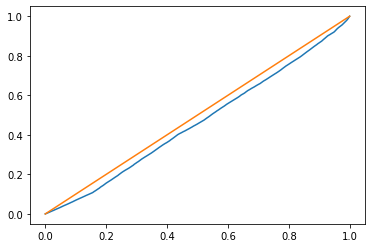

0.46117324561449174

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
arr = np.array(df['renda_familiar_pos_df_sem_miseria'])

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

def lorenz(arr):
   
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

gini(x)


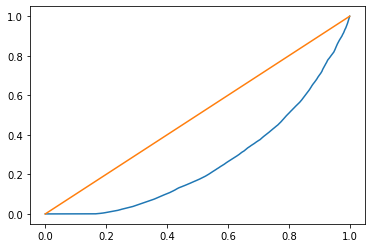

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
arr = np.array(df['renda_familiar_pbf'])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

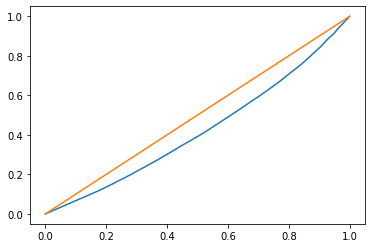

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
arr = np.array(df['renda_familiar_pos_auxilio_brasil'])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

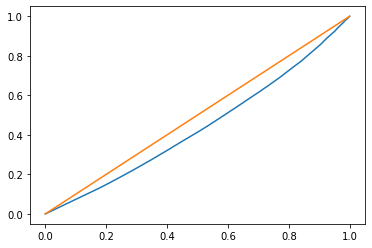

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ensure your arr is sorted from lowest to highest values first!
arr = np.array(df['renda_familiar_pos_ab_df'])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13065 entries, 0 to 13064
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   familia                              13065 non-null  int64  
 1   recebe_pbf                           13065 non-null  int64  
 2   qtde_pessoas                         13065 non-null  int64  
 3   renda_per_capita_pbf                 13065 non-null  int64  
 4   renda_familiar_pbf                   13065 non-null  int64  
 5   renda_familiar_pos_df_sem_miseria    13065 non-null  int64  
 6   renda_per_capita_pos_df_sem_miseria  13065 non-null  float64
 7   renda_familiar_pos_auxilio_brasil    13065 non-null  int64  
 8   renda_percapita_pos_auxilio_brasil   13065 non-null  float64
 9   renda_familiar_pos_ab_df             13065 non-null  int64  
 10  renda_per_capita_pos_ab_df           13065 non-null  float64
dtypes: float64(3), int64(8)
memo

In [ ]:
df['renda_per_capita_pbf'].describe()

count    13065.000000
mean        61.189361
std         55.394431
min          0.000000
25%         24.000000
50%         50.000000
75%         83.000000
max        477.000000
Name: renda_per_capita_pbf, dtype: float64

In [ ]:
df['renda_per_capita_pos_df_sem_miseria'].describe()

count    13065.000000
mean       152.767698
std         24.348329
min        141.333333
25%        145.000000
50%        147.000000
75%        153.000000
max        487.000000
Name: renda_per_capita_pos_df_sem_miseria, dtype: float64

In [ ]:
df['renda_percapita_pos_auxilio_brasil'].describe()

count    13065.000000
mean       225.462602
std         99.227117
min         36.333333
25%        152.000000
50%        200.000000
75%        266.333333
max        606.000000
Name: renda_percapita_pos_auxilio_brasil, dtype: float64

In [ ]:
df['renda_per_capita_pos_ab_df'].describe()

count    13065.000000
mean       287.815546
std        133.807577
min         48.833333
25%        191.666667
50%        250.000000
75%        333.333333
max        756.000000
Name: renda_per_capita_pos_ab_df, dtype: float64

In [ ]:
df['qtde_pessoas'].describe()

count    13065.000000
mean         3.163643
std          1.507537
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: qtde_pessoas, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13065 entries, 0 to 13064
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   familia                              13065 non-null  int64  
 1   recebe_pbf                           13065 non-null  int64  
 2   qtde_pessoas                         13065 non-null  int64  
 3   renda_per_capita_pbf                 13065 non-null  int64  
 4   renda_familiar_pbf                   13065 non-null  int64  
 5   renda_familiar_pos_df_sem_miseria    13065 non-null  int64  
 6   renda_per_capita_pos_df_sem_miseria  13065 non-null  float64
 7   renda_familiar_pos_auxilio_brasil    13065 non-null  int64  
 8   renda_percapita_pos_auxilio_brasil   13065 non-null  float64
 9   renda_familiar_pos_ab_df             13065 non-null  int64  
 10  renda_per_capita_pos_ab_df           13065 non-null  float64
dtypes: float64(3), int64(8)
memo

<Figure size 1080x360 with 0 Axes>

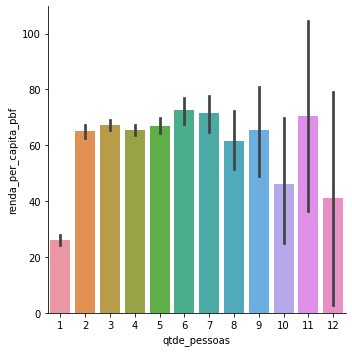

In [ ]:
plt.figure(figsize=(15,5))

sns.catplot(y='renda_per_capita_pbf', x='qtde_pessoas', data=df, kind="bar")

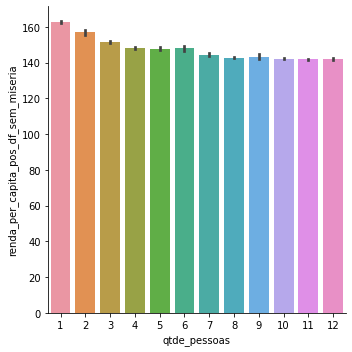

In [ ]:
diamonds = sns.load_dataset("diamonds")

sns.catplot(y='renda_per_capita_pos_df_sem_miseria', x='qtde_pessoas', data=df, kind="bar")

<Figure size 1080x360 with 0 Axes>

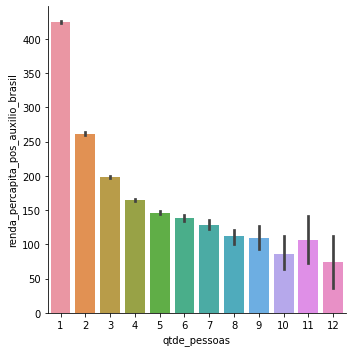

In [ ]:
plt.figure(figsize=(15,5))

sns.catplot(y='renda_percapita_pos_auxilio_brasil', x='qtde_pessoas', data=df, kind="bar")

<Figure size 1080x360 with 0 Axes>

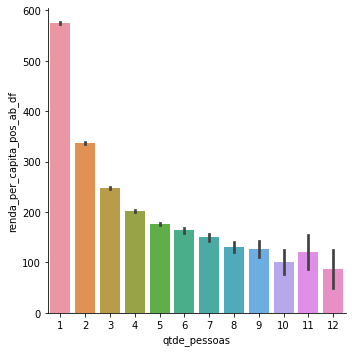

In [ ]:
plt.figure(figsize=(15,5))

sns.catplot(y='renda_per_capita_pos_ab_df', x='qtde_pessoas', data=df, kind="bar")

In [ ]:
df['DecileRankbpf'] = pd.qcut(df['renda_per_capita_pbf'], q = 10, labels = False, duplicates='drop')
df['DecileRankrendapercapitaposauxliobrasil'] = pd.qcut(df['renda_percapita_pos_auxilio_brasil'], q = 12, labels = False)
df['DecileRankrendafamiliarposdfsemmiseria'] = pd.qcut(df['renda_per_capita_pos_df_sem_miseria'], q = 11, labels = False, duplicates='drop')
df['DecileRankrendafamiliarposabdfsocial'] = pd.qcut(df['renda_per_capita_pos_ab_df'], q = 10, labels = False)


<Figure size 1080x360 with 0 Axes>

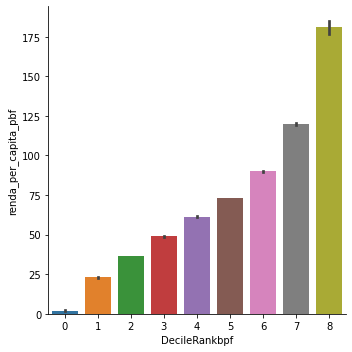

In [ ]:
plt.figure(figsize=(15,5))

sns.catplot(y='renda_per_capita_pbf', x='DecileRankbpf', data=df, kind="bar")

In [ ]:
df["DecileRankrendafamiliarposdfsemmiseria"].value_counts()

5    2187
0    1879
1    1797
8    1235
3    1216
2    1149
9    1120
4    1109
7    1089
6     284
Name: DecileRankrendafamiliarposdfsemmiseria, dtype: int64

<Figure size 1080x360 with 0 Axes>

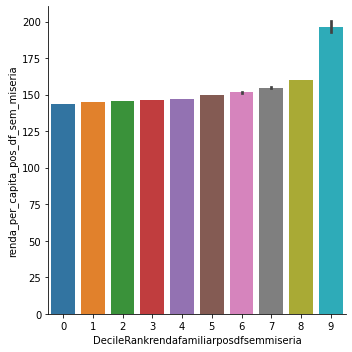

In [ ]:
plt.figure(figsize=(15,5))

sns.catplot(y='renda_per_capita_pos_df_sem_miseria', x='DecileRankrendafamiliarposdfsemmiseria', data=df, kind="bar")

In [ ]:
np.percentile(df["renda_per_capita_pos_df_sem_miseria"], np.arange(0, 100, 10))


array([141.33333333, 144.        , 145.        , 146.        ,
       146.33333333, 147.        , 150.        , 150.        ,
       155.        , 160.        ])

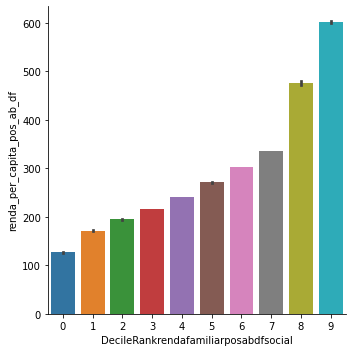

In [ ]:

sns.catplot(y='renda_per_capita_pos_ab_df', x='DecileRankrendafamiliarposabdfsocial', data=df, kind="bar")

In [ ]:
np.percentile(df["renda_per_capita_pos_ab_df"], np.arange(0, 100, 10))


array([ 48.83333333, 150.        , 183.33333333, 206.06666667,
       227.33333333, 250.        , 283.33333333, 316.33333333,
       350.        , 550.        ])

<Figure size 720x360 with 0 Axes>

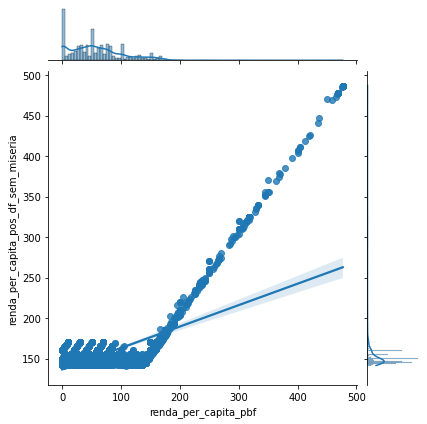

In [ ]:
plt.figure(figsize=(10,5))

sns.jointplot(x='renda_per_capita_pbf', y='renda_per_capita_pos_df_sem_miseria', data=df, kind='reg')

<Figure size 720x360 with 0 Axes>

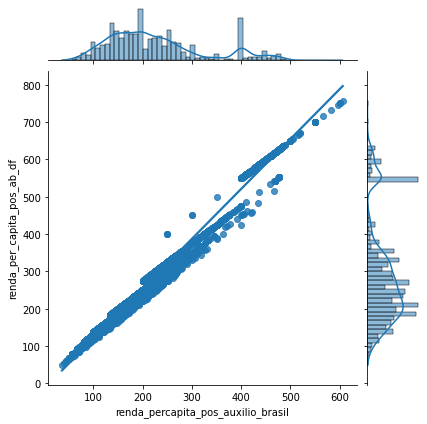

In [ ]:
##valor de renda x empréstimo soliciado ao clientes tomado por clientes inadimplementes
plt.figure(figsize=(10,5))

sns.jointplot(x='renda_percapita_pos_auxilio_brasil', y='renda_per_capita_pos_ab_df', data=df, kind='reg')

Text(0.5, 0, 'Renda Per Capita pós benefício ')

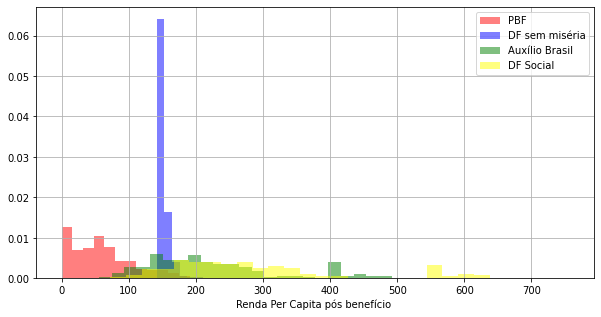

In [ ]:
##comparativo entre inadimplementes e fraudadores
plt.figure(figsize=(10,5))
df['renda_per_capita_pbf'].hist(alpha=0.5, color='red', bins=30, label='PBF', density = True)
df['renda_per_capita_pos_df_sem_miseria'].hist(alpha=0.5, color='blue', bins=30, label='DF sem miséria', density = True)
df['renda_percapita_pos_auxilio_brasil'].hist(alpha=0.5, color='green', bins=30, label='Auxílio Brasil', density = True)
df['renda_per_capita_pos_ab_df'].hist(alpha=0.5, color='yellow', bins=30, label='DF Social', density = True)
plt.legend()
plt.xlabel('Renda Per Capita pós benefício ')

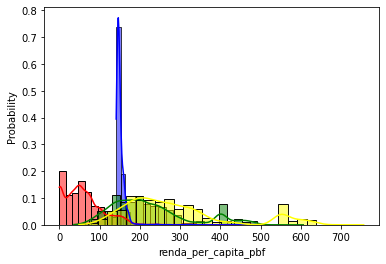

In [ ]:
sns.histplot(data=df, x="renda_per_capita_pbf", color="red", label="PBF", kde=True, stat='probability', bins=30)
sns.histplot(data=df, x="renda_per_capita_pos_df_sem_miseria", color="blue", label="DF sem Miséria", kde=True, stat='probability', bins=30)
sns.histplot(data=df, x="renda_percapita_pos_auxilio_brasil", color="green", label="Auxílio Brasil", kde=True, stat='probability', bins=30)
sns.histplot(data=df, x="renda_per_capita_pos_ab_df", color="yellow", label="DF Social", kde=True, stat='probability', bins=30)


In [ ]:
df.groupby('DecileRankrendafamiliarposdfsemmiseria')['renda_per_capita_pos_df_sem_miseria'].describe()


,count,mean,std,min,25%,50%,75%,max
DecileRankrendafamiliarposdfsemmiseria,,,,,,,,
0,1879.0,143.392848,0.685363,141.333333,143.000000,143.666667,144.000000,144.000000
1,1797.0,144.931725,0.185132,144.142857,145.000000,145.000000,145.000000,145.000000
2,1149.0,145.977392,0.115213,145.333333,146.000000,146.000000,146.000000,146.000000
3,1216.0,146.530702,0.163882,146.333333,146.333333,146.666667,146.666667,146.666667
4,1109.0,147.318906,0.487296,147.000000,147.000000,147.000000,147.666667,148.333333
5,2187.0,149.809197,0.357097,148.666667,149.666667,150.000000,150.000000,150.000000
6,284.0,151.505533,0.520773,150.333333,151.000000,152.000000,152.000000,152.000000
7,1089.0,154.874743,1.290596,152.666667,155.000000,155.000000,155.000000,159.333333
8,1235.0,159.998920,0.018947,159.666667,160.000000,160.000000,160.000000,160.000000


In [ ]:
df.groupby('DecileRankrendafamiliarposabdfsocial')['renda_per_capita_pos_ab_df'].describe()


,count,mean,std,min,25%,50%,75%,max
DecileRankrendafamiliarposabdfsocial,,,,,,,,
0,1308.0,127.381295,19.040865,48.833333,111.937500,135.571429,140.000000,150.000000
1,1474.0,171.371309,10.049838,150.500000,162.500000,173.000000,182.500000,183.333333
2,1138.0,194.643269,6.403579,183.500000,187.500000,194.333333,199.500000,206.000000
3,1310.0,216.143787,5.636484,206.333333,212.500000,216.333333,220.500000,227.333333
4,1319.0,241.076465,7.159205,227.500000,233.333333,239.333333,249.333333,250.000000
5,1496.0,270.909521,9.149255,250.333333,263.333333,275.000000,275.500000,283.333333
6,1196.0,302.960424,10.239760,283.500000,295.000000,300.000000,314.000000,316.333333
7,1239.0,335.836427,10.935163,317.333333,325.000000,335.000000,349.333333,350.000000
8,1756.0,476.031986,80.740578,350.333333,387.000000,550.000000,550.000000,550.000000


<Figure size 1080x360 with 0 Axes>

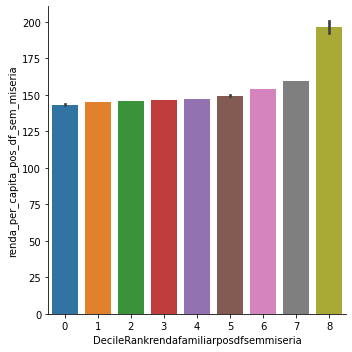

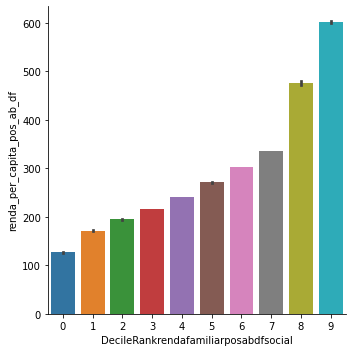

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(y='renda_per_capita_pos_df_sem_miseria', x='DecileRankrendafamiliarposdfsemmiseria', data=df, kind="bar")
sns.catplot(y='renda_per_capita_pos_ab_df', x='DecileRankrendafamiliarposabdfsocial', data=df, kind="bar")


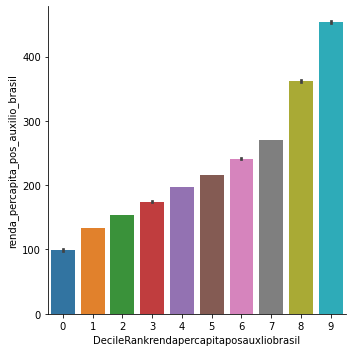

In [ ]:
sns.catplot(y='renda_percapita_pos_auxilio_brasil', x='DecileRankrendapercapitaposauxliobrasil', data=df, kind="bar")


In [ ]:
sns.catplot(y='renda_percapita_pos_auxilio_brasil', x='DecileRankrendapercapitaposauxliobrasil', data=df, kind="bar")
